## 파일 불러오기
index_col 주의

In [1]:
import pandas as pd

In [2]:
df_main_1 = pd.read_csv('C:\\Users\YEOMYEONG\Downloads\[데마]전처리 (1)\data\crash_2015_main_1.csv', engine = 'python', index_col = 0)
df_main_2 = pd.read_csv('C:\\Users\YEOMYEONG\Downloads\[데마]전처리 (1)\data\crash_2015_main_2.csv', engine = 'python', index_col = 0)
df_sub_1 = pd.read_csv('C:\\Users\YEOMYEONG\Downloads\[데마]전처리 (1)\data\crash_2015_sub_1.csv', engine = 'python')
df_sub_2 = pd.read_csv('C:\\Users\YEOMYEONG\Downloads\[데마]전처리 (1)\data\crash_2015_sub_2.csv', engine = 'python')

## 데이터 합치기
위에서 불러온 데이터들을 합쳐 새로운 데이터 프레임을 만듭니다.

합쳐진 데이터를 data.csv 파일로 현재 폴더에 저장합니다.

In [3]:
df_main = pd.concat([df_main_1, df_main_2], axis = 0)
df_sub = pd.concat([df_sub_1, df_sub_2], axis = 0)

In [4]:
print(df_main.shape)
print(df_sub.shape)

pd.set_option('max_columns', None)
df_temp = pd.merge(df_main, df_sub, how = 'left', on = 'PERSON_ID')
df_temp.shape

(47400, 10)
(47381, 18)


(47400, 27)

In [7]:
df_temp.to_csv("C:\\Users\\YEOMYEONG\\Desktop\\[데마]2015-10583_이여명\\temp.csv")

## 결측치 제거
결측치가 10% 이상인 열을 제거합니다.

In [ ]:
num_data = df_temp.shape[0]

for col in df_temp.columns :
    count = df_temp[col].count()
    if count/num_data < 0.9 : # Nan값이 10% 이상인 열 제거
        del df_temp[col]
        print(col +"을 삭제합니다.") #삭제된 column 출력

df_temp.columns # 살아남은 column

In [8]:
df_temp.dropna().shape

(41772, 27)

In [9]:
df = df_temp.dropna()
df

,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,REPORT_NO,SAF_EQUIP_CODE,SEX_CODE,RTE_NO,VEHICLE_ID,COLLISION_TYPE_CODE,C_M_ZONE_FLAG,JUNCTION_CODE,LANE_CODE,LIGHT_CODE,RD_COND_CODE,RD_DIV_CODE,SURF_COND_CODE,WEATHER_CODE,AREA_DAMAGED_CODE_MAIN,BODY_TYPE_CODE,DAMAGE_CODE,HIT_AND_RUN_FLAG,MOVEMENT_CODE,TIME,AGE
0,Apparently Normal,No Misuse,N,No Injury,a33f1d87-624c-4608-a11e-84d03ecd067a,D,AB36760008,Shoulder/Lap Belt(s),M,1111.0,4b70c791-85c1-43a1-b2d0-be74e36ca8a7,Same Direction Rear End Left Turn,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Functional,Y,Starting From Parked,2015-01-24 1:40,42.0
2,Apparently Normal,No Misuse,N,No Injury,517a3a6f-3d0d-4cda-8e42-836efaf5f55d,D,AC2017000W,Shoulder/Lap Belt(s),F,1665.0,0d177528-9315-4503-a7b9-3f72d888795c,Same Direction Rear End,N,Intersection Related,Right Turn Lane,Daylight,No Defects,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13,9999.0
3,Apparently Normal,No Misuse,N,Possible Incapacitating Injury,9dfe84cd-9dce-4aeb-9618-e11af38d88e1,D,AC2017000W,Shoulder/Lap Belt(s),F,2210.0,a5b0e5ce-bc99-4338-9a1c-a519b7b81b9c,Same Direction Rear End,N,Intersection Related,Right Turn Lane,Daylight,No Defects,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Disabling,N,Stopped in Traffic Lane,2015-03-26 11:13,48.0
7,Apparently Normal,No Misuse,N,No Injury,054c51cf-ab1c-4336-a0cc-d5573d143851,D,ADJ0470007,Shoulder/Lap Belt(s),F,1810.0,8aa9db2e-7014-4770-afac-89fbdeba830c,Opposite Direction Both Left Turn,N,Non Intersection,Right Turn Lane,Daylight,No Defects,"Two-way, Not Divided",Wet,Clear,Eleven o'clock,Passenger Car,Functional,N,Moving Constant Speed,2015-02-17 15:13,38.0
8,Apparently Normal,No Misuse,N,No Injury,41ba235a-3453-4f88-9067-834676fbdab8,D,ADJ1450003,Shoulder/Lap Belt(s),F,1957.0,2d490013-9394-407c-b665-64aa98e076a6,Same Direction Sideswipe,N,Non Intersection,Right Turn Lane,Daylight,No Defects,One-way Trafficway,Dry,Clear,Twelve o'clock,Passenger Car,Superficial,N,Stopped in Traffic Lane,2015-01-28 8:29,32.0
9,Apparently Normal,No Misuse,N,No Injury,cff37836-0c24-4fb7-9708-e4058913974f,D,ADJ424000J,Shoulder/Lap Belt(s),M,451.0,f00bc18e-7929-4c67-acff-debbb608ba2c,Same Direction Rear End,N,Non Intersection,Left Turn Lane,Dusk,No Defects,"Two-way, Not Divided",Dry,Clear,Six o'clock,Passenger Car,Superficial,N,Slowing or Stopping,2015-03-27 19:35,56.0
10,Apparently Normal,No Misuse,Y,No Injury,402cd4a5-c1a4-479d-8bdf-3859cf740c17,D,ADJ531000Y,Shoulder/Lap Belt(s),F,7.0,9059e8df-a9dc-4b92-8c51-502dcb4afb2b,Same Direction Rear End,N,Non Intersection,Acceleration Lane,Daylight,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Wet,Clear,Twelve o'clock,(Sport) Utility Vehicle,Superficial,N,Moving Constant Speed,2015-03-02 11:20,46.0
11,Apparently Normal,No Misuse,N,No Injury,2ee1743d-c094-4c03-b2bc-800d2dc2530d,D,ADX0070003,Shoulder/Lap Belt(s),M,1621.0,3c49a8cb-ed96-44c5-8323-328700fd3beb,Opposite Direction Sideswipe,N,Non Intersection,Right Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Dry,Clear,Twelve o'clock,Passenger Car,Disabling,N,Moving Constant Speed,2015-02-04 17:25,30.0
12,Apparently Normal,No Misuse,N,No Injury,325bec56-125e-42ff-9672-341542beeac4,D,AE26320011,Shoulder/Lap Belt(s),M,508.0,c10822cd-9278-4569-acfe-7529d2c09be6,Same Direction Rear End,N,Intersection,Left Turn Lane,Dark Lights On,No Defects,"Two-way, Not Divided",Wet,Raining,Six o'clock,Passenger Car,Superficial,N,Slowing or Stopping,2015-01-12 17:03,25.0
13,Apparently Normal,No Misuse,N,No Injury,3426f3ab-c9b7-40e6-9b63-6199f7e4c31b,D,AE27810005,Shoulder/Lap Belt(s),M,507.0,153e0a19-4b00-4c5a-8799-611b58a1fc02,Same Direction Rear End,N,Non Intersection,Left Turn Lane,Daylight,No Defects,"Two-way, Divided, Positive Median Barrier",Ice,Wintry Mix,Seven o'clock,(Sport) Utility Vehicle,Disabling,N,Movi

## 데이터 전처리

수치형 값을 갖는 열의 아웃라이어를 제거합니다. (IQR 이용, 다른 방법으로 아웃라이어 제거할 시에 감점을 당할 수 있음)

In [10]:
quartile_1 = df['AGE'].quantile(0.25)
quartile_3 = df['AGE'].quantile(0.75)
IQR = quartile_3 - quartile_1
df_search = df[(df['AGE'] < (quartile_1 - 1.5 * IQR)) | (df['AGE'] > (quartile_3 + 1.5 * IQR))]
print(df_search)

          CONDITION_CODE EQUIP_PROB_CODE FAULT_FLAG  \
2      Apparently Normal       No Misuse          N   
2592   Apparently Normal       No Misuse          Y   
5032     Other Handicaps       No Misuse          Y   
5595   Apparently Normal       No Misuse          Y   
8463    Fatigued Fainted       No Misuse          Y   
8546    Physical Defects       No Misuse          Y   
9577   Apparently Normal       No Misuse          N   
11295  Apparently Normal       No Misuse          N   
12722  Apparently Normal       No Misuse          Y   
15408  Apparently Normal       No Misuse          N   
15718  Apparently Normal       No Misuse          N   
15719  Apparently Normal       No Misuse          Y   
15720  Apparently Normal       No Misuse          N   
23995  Apparently Normal       No Misuse          N   
24065  Apparently Normal       No Misuse          Y   
25512  Apparently Normal       No Misuse          Y   
31668  Apparently Normal       No Misuse          Y   
36448  App

In [11]:
df = df.drop(df_search.index, axis=0)
print(df)

                                          CONDITION_CODE  EQUIP_PROB_CODE  \
0                                      Apparently Normal        No Misuse   
3                                      Apparently Normal        No Misuse   
7                                      Apparently Normal        No Misuse   
8                                      Apparently Normal        No Misuse   
9                                      Apparently Normal        No Misuse   
10                                     Apparently Normal        No Misuse   
11                                     Apparently Normal        No Misuse   
12                                     Apparently Normal        No Misuse   
13                                     Apparently Normal        No Misuse   
14                                     Apparently Normal        No Misuse   
15                                     Apparently Normal        No Misuse   
16                                     Apparently Normal        No Misuse   

## 더미변수화
범주의 종류가 20개 이하인 항목에 대해서 더미변수화를 실행합니다.
20개를 초과하는 변수는 제거합니다.

In [12]:
for col_num, type_ in enumerate(df.dtypes) :
    if type_ != 'float64' and type_ != 'int64' :
        if len(df.iloc[:,col_num].unique()) > 20 :
            print(df.columns[col_num])

PERSON_ID
REPORT_NO
VEHICLE_ID
BODY_TYPE_CODE
TIME


In [13]:
print(len(df['PERSON_ID'].unique()))
print(len(df['REPORT_NO'].unique()))
print(len(df['VEHICLE_ID'].unique()))
print(len(df['BODY_TYPE_CODE'].unique()))
print(len(df['TIME'].unique()))

41744
26473
41744
27
25145


In [14]:
del df['PERSON_ID']
del df['REPORT_NO']
del df['VEHICLE_ID']
del df['BODY_TYPE_CODE']

In [15]:
df['TIME'] = pd.to_datetime(df['TIME'])
df['TIME'] = df['TIME'].apply(lambda x : x.month)
df['TIME']

0         1
3         3
7         2
8         1
9         3
10        3
11        2
12        1
13        1
14        2
15        3
16        2
17        2
18        1
19        1
20        2
22        1
23        1
24        3
25        3
26        1
28        3
33        3
34        3
37        3
39        3
40        1
41        3
43        2
44        1
         ..
46072    10
46073    12
46074    10
46075    10
46076    10
46077    10
46078    10
46079    10
46080    10
46081    11
46082    11
47378    12
47379    12
47380    11
47381    12
47385    11
47386    10
47387    11
47388    10
47389    11
47390    10
47391    10
47392    11
47393    10
47394    12
47395    11
47396    12
47397    10
47398    11
47399    12
Name: TIME, Length: 41744, dtype: int64

In [16]:
df_final = df.copy()
for col_num, type_ in enumerate(df_final.dtypes) :
    if type_ == 'object':
        col = df_final.columns[col_num]
        print(col)
        df = pd.get_dummies(df, prefix=col, columns=[col])

CONDITION_CODE
EQUIP_PROB_CODE
FAULT_FLAG
INJ_SEVER_CODE
PERSON_TYPE
SAF_EQUIP_CODE
SEX_CODE
COLLISION_TYPE_CODE
C_M_ZONE_FLAG
JUNCTION_CODE
LANE_CODE
LIGHT_CODE
RD_COND_CODE
RD_DIV_CODE
SURF_COND_CODE
WEATHER_CODE
AREA_DAMAGED_CODE_MAIN
DAMAGE_CODE
HIT_AND_RUN_FLAG
MOVEMENT_CODE


## 최종 데이터 저장
모든 전처리가 끝난 데이터를 final.csv로 저장합니다.

In [17]:
df.to_csv("C:\\Users\\YEOMYEONG\\Desktop\\[데마]2015-10583_이여명\\final.csv")

## 평가
1. 위의 각 항목들이 잘 이루어졌는지 평가
2. 아래 식에 데이터 프레임을 넣었을 때 오류가 없는지 평가

예를 들어 데이터 asd를 넣었을 경우 다음과 같이 실행되디만 하면 됨.

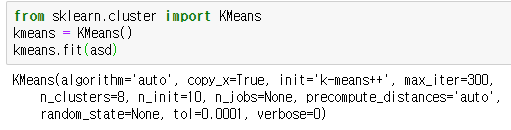

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(asd)